<h1 style="font-size:3rem;color:lightgreen;">Lab Practice: Multiclass Classification, ReLU, and Softmax

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf

## Part 1: Multiclass Classification

In [7]:
# Create dataset

classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

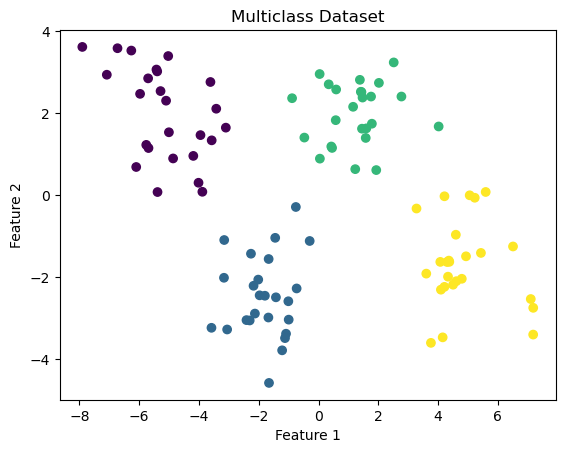

In [3]:
# Visualize the dataset

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('Multiclass Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercise 2: Build and Train the Model

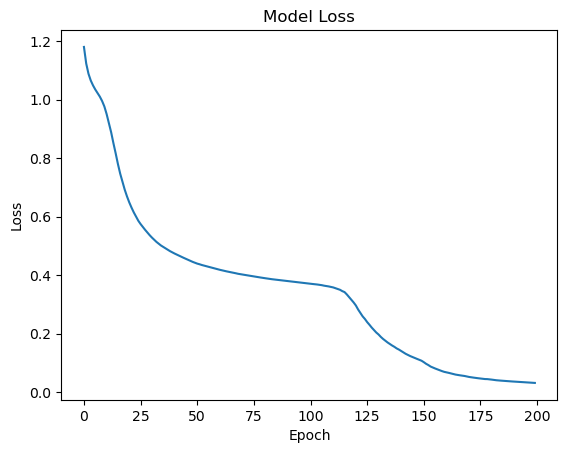

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', name="L1"),
    tf.keras.layers.Dense(4, activation='linear', name="L2")
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Exercise 3: Visualize Decision Boundaries

551/551 [==============================] - 1s 1ms/step


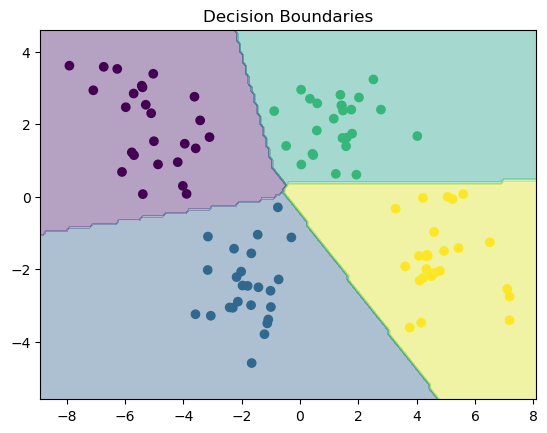

In [5]:
# Implement a function to visualize the decision boundaries of the trained model

def plot_decision_boundary(X, y, model):
    X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.1), 
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title('Decision Boundaries')
    plt.show()

plot_decision_boundary(X_train, y_train, model)

    

## Part 2: ReLU Activation Function

### Exercise 4: Implement ReLU

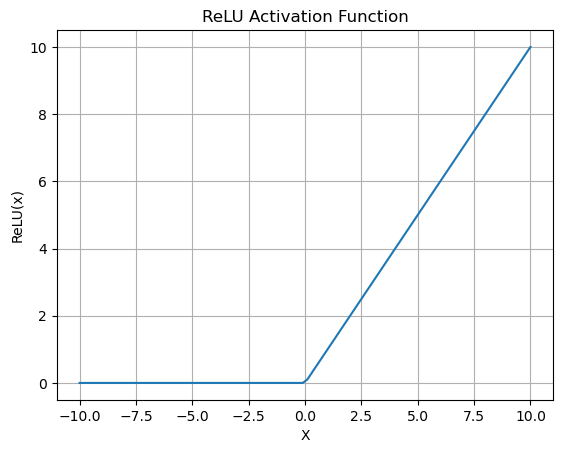

In [8]:
# Implement the ReLU activation function and visualize its behavior

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('X')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

### Exercise 5: Compare ReLU with Sigmoid

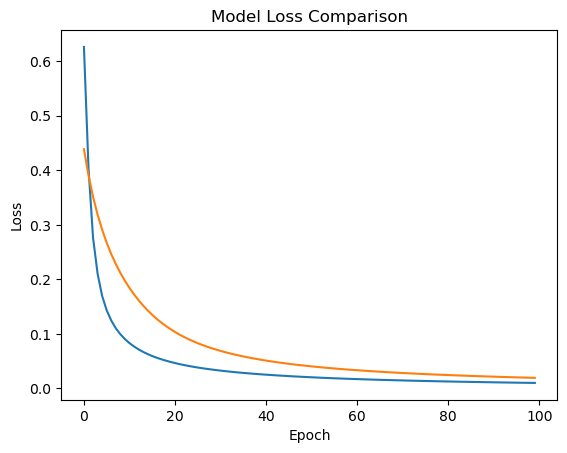

In [9]:
# Implement a simple neural network using ReLU and Sigmoid activations, and compare their performance

# Generate a simple dataset
X = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = (X > 0).astype(int).reshape(-1, 1)

# ReLU model
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Sigmoid model
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

# Compile and train both models
model_relu.compile(optimizer='adam', loss='binary_crossentropy')
model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy')

history_relu = model_relu.fit(X, y, epochs=100, verbose=0)
history_sigmoid = model_sigmoid.fit(X, y, epochs=100, verbose=0)

# Plot loss comparison
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Part 3: Softmax Function

### Exercise 6: Implement Softmax

input: [2.  1.  0.1]
softmax output: [0.65900114 0.24243297 0.09856589]
Sum of softmax outputs: 1.0


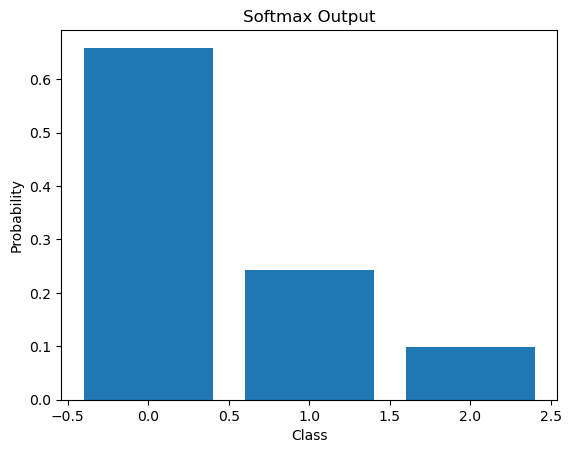

In [10]:
# Implement the Softmax function and visualize its behavior for different input values

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis = 0)

# Example inputs
z = np.array([2.0, 1.0, 0.1])

# Compute softmax
softmax_output = softmax(z)

print('input:', z)
print('softmax output:', softmax_output)
print('Sum of softmax outputs:', np.sum(softmax_output))

# Visualize softmax output
plt.bar(range(len(z)), softmax_output)
plt.title('Softmax Output')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()

### Exercise 7: Softmax in Multiclass classification

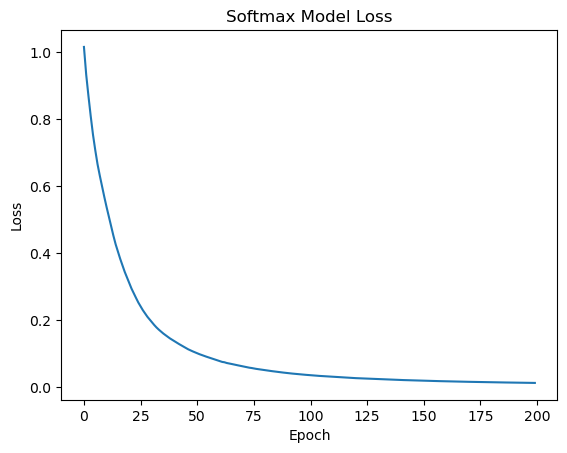

551/551 [==============================] - 1s 1ms/step


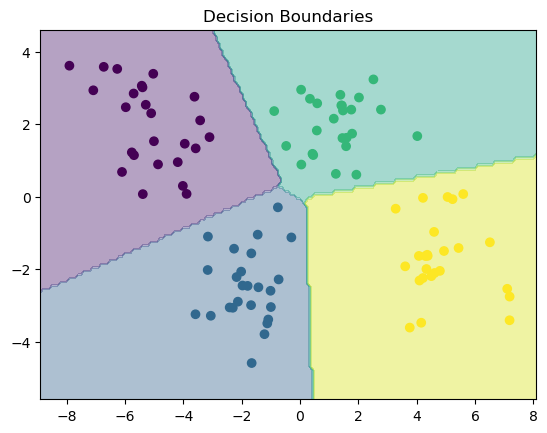

In [15]:
# Modify the multiclass classification model from Exercise 2 to use softmax activation in the output layer

model_softmax = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', name="L1"),
    tf.keras.layers.Dense(4, activation='softmax', name="L2")
])

model_softmax.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

history_softmax = model_softmax.fit(X_train, y_train, epochs=200, verbose=0)

# Plot training loss
plt.plot(history_softmax.history['loss'])
plt.title('Softmax Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Visualize decision boundaries
plot_decision_boundary(X_train, y_train, model_softmax)

## Conclusion

In this lab, you’ve implemented and explored multiclass classification using neural networks, the ReLU activation function, and the Softmax function. You’ve
visualized decision boundaries, compared different activation functions, and applied Softmax to multiclass problems. These concepts are fundamental in deep
learning and have wide applications in various domains.